In [71]:
## Para manejar DataFrame
import pandas as pd
import numpy as np
## Para hacer gráficas
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objs as go
import plotly.plotly as py
import datetime, requests
%matplotlib inline
## Para hacer análsis estadísticos
from factor_analyzer import FactorAnalyzer
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.mixture import GaussianMixture
from sklearn.cluster import KMeans
from sklearn.manifold import MDS


## Importacion del dataset

In [301]:
## Poblacion total
pob_tot = pd.read_excel("/home/mcorral/Eliot/Pensiones/pob_tot_10.xls")

## Poblacion instruida
pob_int = pd.read_excel("/home/mcorral/Eliot/Pensiones/pob_inst_10.xls")

## Poblacion con educacion
pob_edu = pd.read_excel("/home/mcorral/Eliot/Pensiones/pob_edu_10.xls")

## Poblacion con discapacidad
pob_dis = pd.read_excel("/home/mcorral/Eliot/Pensiones/pob_disc_10.xls")

## Poblacion Economicamente Activa al 2010
PEA = pd.read_excel("/home/mcorral/Eliot/Pensiones/PEA2010.xls")

## Proyeciones conapo Indicadores Demograficos
proy = pd.read_csv("/home/mcorral/Eliot/Pensiones/ind_dem_proyecciones.csv",encoding="iso-8859-15")
mit_anne = pd.read_csv("/home/mcorral/Eliot/Pensiones/pob_mit_proyecciones.csv",encoding="iso-8859-15")

## Analisis de los datos
### Vamos a ver cual es la naturaleza de los datos, y que podemos observar de ellos.

#### Prorateo de los No especificados

In [4]:
#Poblacion de hombres por edades quinquenales
pob_tot_h = pob_tot[pob_tot['Sexo'] =='Hombres'][['Población total','Grupos quinquenales de edad']][['Población total','Grupos quinquenales de edad']].reset_index().drop(['index'], axis=1).rename(index=str, columns={"Población total": "Poblacion", "Grupos quinquenales de edad": "Edades"})
#Poblacion de mujeres por edades quinquenales
pob_tot_m = pob_tot[pob_tot['Sexo'] =='Mujeres'][['Población total','Grupos quinquenales de edad']][['Población total','Grupos quinquenales de edad']].reset_index().drop(['index'], axis=1).rename(index=str, columns={"Población total": "Poblacion", "Grupos quinquenales de edad": "Edades"})

In [5]:
Pob_tot_H = pob_tot_h[pob_tot_h['Edades'] !='Total'][pob_tot_h['Edades'] !='No especificado'][pob_tot_h['Poblacion'] != 54855231][pob_tot_h['Poblacion'] != 700219].reset_index().drop(['index'], axis=1)
Pob_tot_M = pob_tot_m[pob_tot_m['Edades'] !='Total'][pob_tot_m['Edades'] !='No especificado'][pob_tot_m['Poblacion'] != 57481307][pob_tot_m['Poblacion'] != 697187].reset_index().drop(['index'], axis=1)

/home/mcorral/.pyenv/versions/3.6.0/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

/home/mcorral/.pyenv/versions/3.6.0/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



In [6]:
h = 54855231
Neh= 700219
H = h-Neh
m = 57481307
Nem = 697187
M = m-Nem

In [8]:
Pob_tot_H1 = Pob_tot_H[['Poblacion']]/H
Pob_tot_M1 = Pob_tot_M[['Poblacion']]/M

In [9]:
Pob_tot_H1

,Poblacion
0,0.098734
1,0.103484
2,0.102440
3,0.101932
4,0.088878
5,0.077665
6,0.074343
7,0.073211
8,0.061865
9,0.052153


In [10]:
Pob_tot_H1[['Poblacion']].sum()

Poblacion    1.0
dtype: float64

In [11]:
Pob_tot_H2 = Pob_tot_H1[['Poblacion']]*Neh
Pob_tot_M2 = Pob_tot_M1[['Poblacion']]*Nem

In [12]:
Pob_tot_H2

,Poblacion
0,69135.449190
1,72461.433751
2,71730.092632
3,71374.623765
4,62234.256207
5,54382.844722
6,52056.186430
7,51263.673944
8,43319.335254
9,36518.749838


In [13]:
Pob_tot_H3 = Pob_tot_H[['Poblacion']]+Pob_tot_H2
Pob_tot_M3 = Pob_tot_M[['Poblacion']]+Pob_tot_M2

In [14]:
Pob_tot_H['Hombres']=Pob_tot_H3
Pob_tot_M['Mujeres']=Pob_tot_M3

In [15]:
Pob_tot_H = Pob_tot_H.drop(['Poblacion'], axis=1)
Pob_tot_M = Pob_tot_M.drop(['Poblacion'], axis=1)

In [16]:
Pob_tot_H

,Edades,Hombres
0,00-04 años,5.416078e+06
1,05-09 años,5.676636e+06
2,10-14 años,5.619343e+06
3,15-19 años,5.591496e+06
4,20-24 años,4.875438e+06
5,25-29 años,4.260358e+06
6,30-34 años,4.078087e+06
7,35-39 años,4.016002e+06
8,40-44 años,3.393641e+06
9,45-49 años,2.860883e+06


### Juntamos tabla Hombres y Mujeres en una sola

In [17]:
Pob_tot = Pob_tot_H.merge(Pob_tot_M,
                         left_on='Edades',
                         right_on = 'Edades',
                         how = 'inner')

In [367]:
Pob_tot

NameError: name 'Pob_tot' is not defined

### Vamos a hacer algunas graficas

/home/mcorral/.pyenv/versions/3.6.0/lib/python3.6/site-packages/matplotlib/ticker.py:1437: UserWarning:

'set_params()' not defined for locator of type <class 'matplotlib.category.StrCategoryLocator'>



Text(0.5, 1.0, 'Distribucion poblacion por edad y sexo')

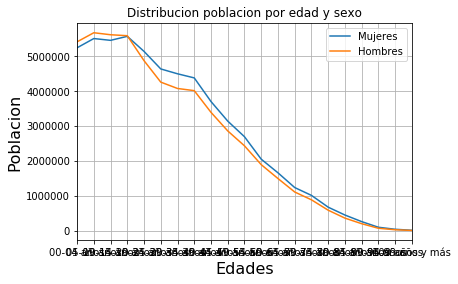

In [18]:
plt.plot(Pob_tot['Edades'],Pob_tot['Mujeres'],
         Pob_tot['Edades'],Pob_tot['Hombres'])
plt.xlim([0,20])
plt.locator_params(axis='x')
plt.locator_params(axis='y')
plt.xlabel('Edades',size=16)
plt.ylabel('Poblacion',size=16)
plt.grid()
plt.legend(['Mujeres','Hombres'])
plt.title('Distribucion poblacion por edad y sexo')
#plt.savefig('distripoblacionedadsexo.png',dpi=600)

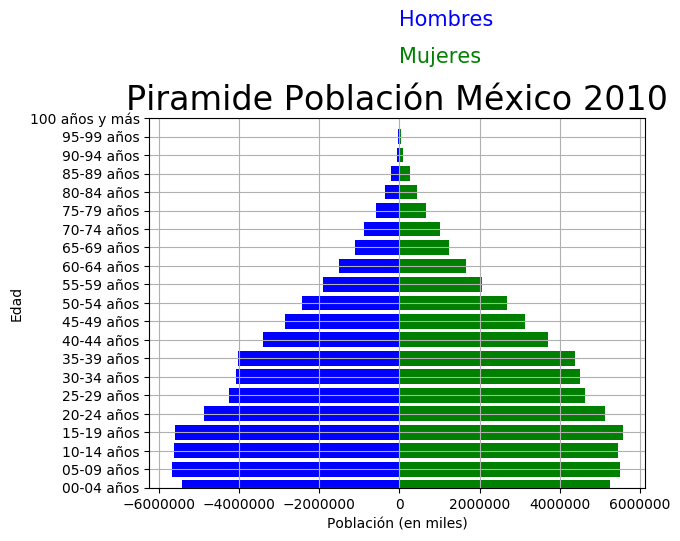

In [19]:
plt.rcdefaults()
fig,ax = plt.subplots()
y_pos = Pob_tot['Edades']
ax.barh(y_pos, Pob_tot['Mujeres'], align='center',
        color='green', ecolor='black')
ax.barh(y_pos,-Pob_tot['Hombres'],align='center',color='blue',ecolor='black')
ax.set_yticks(y_pos)
#ax.set_xticks([-4000,-3500,-3000,-2500,-2000,-1500,-1000,-500,0,
#               500,1000,1500,2000,2500,3000,3500,400,])
#ax.set_xticklabels(['4','3.5','3','2.5','2','1.5','1','5','0'
#                    ,'.5','1','1.5','2','2.5','3','3.5','4'])
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Población (en miles)',size=10)
ax.set_ylabel('Edad')
ax.locator_params(axis='y',nbins=25)
plt.ylim(0,20)
ax.set_title('Piramide Población México 2010',size=24)
ax.grid(True)
plt.text(1500, 23, 'Mujeres',color='green',size=15)
plt.text(3000,25,'Hombres',color='blue',size=15)
plt.rcParams["figure.figsize"]=[12,7]
#plt.savefig('piramide2010.png')
plt.show()

### Poblacion instruida

### Análsis del contenido de la tabla de datos

In [206]:
#Poblacion de hombres por edades quinquenales
pob_Ins_h = pob_int[pob_int['SEXO'] =='Hombres'].reset_index().drop(['index'],axis=1)
#Poblacion de mujeres por edades quinquenales
pob_Ins_m = pob_int[pob_int['SEXO'] =='Mujeres'].reset_index().drop(['index'],axis=1)

In [207]:
Pob_INS = pob_Ins_h.append(pob_Ins_m).drop(['Pais'],axis=1)

In [208]:
# Tipo de variables
Var_d = ['SEXO','EDAD']
Var_c = [x for x in Pob_INS.columns if x not in Var_d]


#### A continuacion, vamos a escalar

In [209]:
sc = StandardScaler()
mm = MinMaxScaler()

In [210]:
sc.fit(Pob_INS[Var_c])
mm.fit(Pob_INS[Var_c])

/home/mcorral/.pyenv/versions/3.6.0/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning:

Data with input dtype int64 were all converted to float64 by StandardScaler.

/home/mcorral/.pyenv/versions/3.6.0/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning:

Data with input dtype int64 were all converted to float64 by MinMaxScaler.



MinMaxScaler(copy=True, feature_range=(0, 1))

In [211]:
Xs = pd.DataFrame(sc.transform(Pob_INS[Var_c]),columns=Var_c)
Xmm = pd.DataFrame(mm.transform(Pob_INS[Var_c]),columns=Var_c)

/home/mcorral/.pyenv/versions/3.6.0/lib/python3.6/site-packages/ipykernel_launcher.py:1: DataConversionWarning:

Data with input dtype int64 were all converted to float64 by StandardScaler.



### Análisis de componentes principales, y análisis factorial

In [212]:

pca = PCA(n_components=2)
mds = MDS(n_components=2)
pca.fit(Xs)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [213]:
Xp = pd.DataFrame(pca.transform(Xs),columns=['p1','p2'])
Xmm = pd.DataFrame(mds.fit_transform(Xmm),columns=['d1','d2'])

In [214]:
Xp.corr()

,p1,p2
p1,1.000000e+00,-1.529957e-14
p2,-1.529957e-14,1.000000e+00


In [215]:
pca.explained_variance_ratio_

array([0.96391556, 0.01856174])

In [216]:
np.cumsum(pca.explained_variance_ratio_)

array([0.96391556, 0.9824773 ])

In [217]:
fa =FactorAnalyzer()

In [218]:
fa.analyze(Xs,2,rotation='varimax')

In [219]:
fa.loadings

,Factor1,Factor2
Población de 18 años y más,0.746457,0.663568
Sin educación superior,0.751485,0.656331
Tecnico1,0.810650,0.536899
Tecnico2,0.835562,0.544535
"Tecnico3,4",0.802407,0.557545
No especificado,0.798681,0.586082
Profesional1,0.758177,0.591045
Profesional2,0.738442,0.635610
Profesional3,0.762075,0.634815
Profesional4,0.726881,0.677865


In [220]:
pca =PCA()
pca.fit(Xs)
Xp=pd.DataFrame(pca.transform(Xs),columns=['p%d'%(i+1) for i in range(len(Xs.columns))])

In [221]:
pca.explained_variance_ratio_.cumsum()

array([0.96391556, 0.9824773 , 0.99418748, 0.99718912, 0.99853607,
       0.9994007 , 0.99967891, 0.99983236, 0.99993654, 0.99996775,
       0.99998403, 0.99999368, 0.99999789, 0.99999952, 1.        ,
       1.        ])

In [222]:
#La explicacion de la varianza es:
pca.explained_variance_ratio_.cumsum()

array([0.96391556, 0.9824773 , 0.99418748, 0.99718912, 0.99853607,
       0.9994007 , 0.99967891, 0.99983236, 0.99993654, 0.99996775,
       0.99998403, 0.99999368, 0.99999789, 0.99999952, 1.        ,
       1.        ])

### De la siguiente forma se acomglomeran los datos

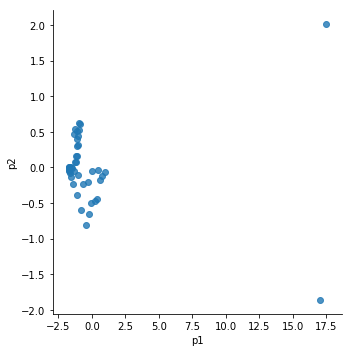

In [223]:
sns.lmplot(data=Xp,x='p1',y='p2',fit_reg=False)

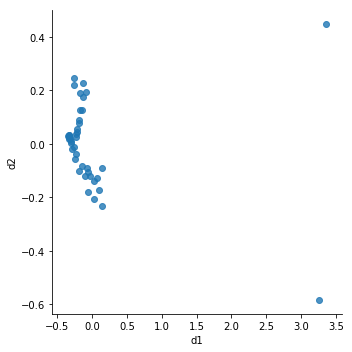

In [224]:
sns.lmplot(data=Xmm,x='d1',y='d2',fit_reg=False)

### Vamos a realizar unos clusters para ver patrones en los datos

In [225]:
l = []
for k in range(2,10):
    km =KMeans(n_clusters=k)
    km.fit(Xs)
    l.append(km.inertia_)

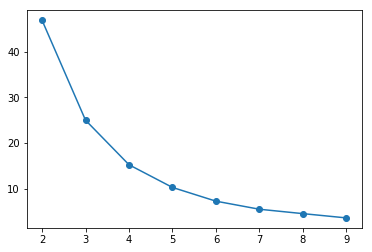

In [226]:
plt.plot(range(2,10),l,marker='o')

In [227]:
gmm = GaussianMixture(n_components=4)
gmm.fit(Xs)
Xp['gmm'] = Xmm['gmm'] = Pob_INS['gmm'] = Xs['gmm'] = gmm.predict(Xs)


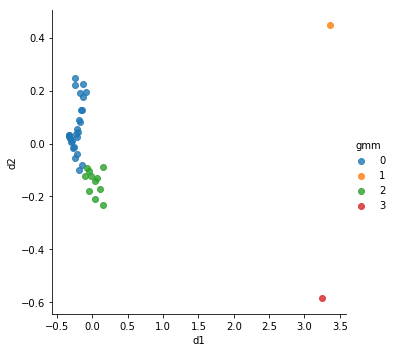

In [230]:
sns.lmplot(data=Xmm,x='d1',y='d2',fit_reg=False,hue='gmm')

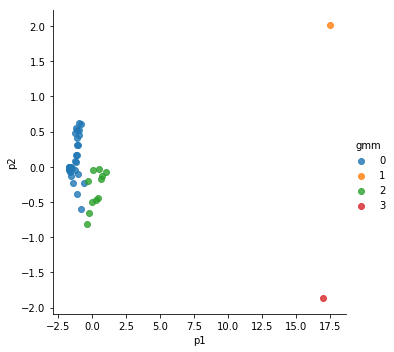

In [231]:
sns.lmplot(data=Xp,x='p1',y='p2',fit_reg=False,hue='gmm')


### Perfilamiento de los datos

In [121]:
Xs.groupby('cl').mean()

,Población de 18 años y más,Sin educación superior,Tecnico1,Tecnico2,"Tecnico3,4",No especificado,Profesional1,Profesional2,Profesional3,Profesional4,Profesional5,Profesional6,No especificado.1,Maestría,Doctorado,No especificado.2,gmm
cl,,,,,,,,,,,,,,,,,
0,-0.318994,-0.313575,-0.237837,-0.309273,-0.350186,-0.335398,-0.216320,-0.250405,-0.290996,-0.361773,-0.373913,-0.365226,-0.352059,-0.379495,-0.335854,-0.305910,2.344828
1,4.613483,4.661997,4.730443,5.065017,5.235690,5.061647,4.188874,4.128248,4.526146,4.546658,3.852105,3.557237,4.132376,3.875067,3.055628,4.683072,1.000000
2,0.041040,0.026093,-0.155914,0.032657,0.159260,0.102422,-0.217410,-0.131980,-0.028681,0.169818,0.208662,0.189456,0.138048,0.223704,0.125403,0.009828,0.000000
3,4.185911,4.144671,3.881873,3.544691,3.167849,3.538249,4.475920,4.585290,4.228215,4.076756,4.696093,4.950310,4.558793,4.669542,5.304704,4.080214,1.000000


In [122]:
Edad = Xs.merge(Pob_INS[['EDAD']],how='left',left_index=True,right_index=True)

In [126]:
Edad

,Población de 18 años y más,Sin educación superior,Tecnico1,Tecnico2,"Tecnico3,4",No especificado,Profesional1,Profesional2,Profesional3,Profesional4,Profesional5,Profesional6,No especificado.1,Maestría,Doctorado,No especificado.2,cl,gmm,EDAD
0,4.185911,4.144671,3.881873,3.544691,3.167849,3.538249,4.475920,4.585290,4.228215,4.076756,4.696093,4.950310,4.558793,4.669542,5.304704,4.080214,3,1,Total
0,4.185911,4.144671,3.881873,3.544691,3.167849,3.538249,4.475920,4.585290,4.228215,4.076756,4.696093,4.950310,4.558793,4.669542,5.304704,4.080214,3,1,Total
1,-0.305154,-0.279776,0.588945,-0.453143,-0.442292,-0.387126,0.004193,-0.458607,-0.460756,-0.453864,-0.449905,-0.447766,-0.425546,-0.449716,-0.440017,-0.325434,0,3,18 años
1,-0.305154,-0.279776,0.588945,-0.453143,-0.442292,-0.387126,0.004193,-0.458607,-0.460756,-0.453864,-0.449905,-0.447766,-0.425546,-0.449716,-0.440017,-0.325434,0,3,18 años
2,-0.330372,-0.324410,0.002325,0.018971,-0.442292,-0.352192,0.347356,-0.053130,-0.460756,-0.453864,-0.449905,-0.447766,-0.398176,-0.449716,-0.440017,-0.270173,0,3,19 años
2,-0.330372,-0.324410,0.002325,0.018971,-0.442292,-0.352192,0.347356,-0.053130,-0.460756,-0.453864,-0.449905,-0.447766,-0.398176,-0.449716,-0.440017,-0.270173,0,3,19 años
3,-0.320096,-0.324368,-0.024024,-0.211607,-0.354684,-0.333270,0.313030,0.215235,-0.120641,-0.453864,-0.449905,-0.447766,-0.375511,-0.449716,-0.440017,-0.190217,0,3,20 años
3,-0.320096,-0.324368,-0.024024,-0.211607,-0.354684,-0.333270,0.313030,0.215235,-0.120641,-0.453864,-0.449905,-0.447766,-0.375511,-0.449716,-0.440017,-0.190217,0,3,20 años
4,-0.340471,-0.350912,-0.175084,-0.219550,-0.342054,-0.322789,0.014947,0.141379,-0.035200,-0.364014,-0.449905,-0.447766,-0.373420,-0.449716,-0.440017,-0.241238,0,3,21 años
4,-0.340471,-0.350912,-0.175084,-0.219550,-0.342054,-0.322789,0.014947,0.141379,-0.035200,-0.364014,-0.449905,-0.447766,-0.373420,-0.449716,-0.440017,-0.241238,0,3,21 años


In [145]:
aux = Edad.pivot_table(index='EDAD',columns='gmm',aggfunc='count',values='cl').fillna(0).reset_index()
plt.savefig('Cluster.png')

<Figure size 432x288 with 0 Axes>

In [148]:
aux

gmm,EDAD,0,1,2,3
0,18 años,0.0,0.0,0.0,2.0
1,19 años,0.0,0.0,0.0,2.0
2,20 años,0.0,0.0,0.0,2.0
3,21 años,0.0,0.0,0.0,2.0
4,22 años,0.0,0.0,0.0,2.0
5,23 años,0.0,0.0,2.0,0.0
6,24 años,0.0,0.0,2.0,0.0
7,25-29 años,2.0,0.0,0.0,0.0
8,30-34 años,2.0,0.0,0.0,0.0
9,35-39 años,2.0,0.0,0.0,0.0


### Pob con Discapacidad

In [232]:
#Poblacion de hombres por edades quinquenales
pob_Dis_h = pob_dis[pob_dis['Sexo'] =='Hombres'].reset_index().drop(['index'],axis=1)
#Poblacion de mujeres por edades quinquenales
pob_Dis_m = pob_dis[pob_dis['Sexo'] =='Mujeres'].reset_index().drop(['index'],axis=1)

In [233]:
Pob_DIS = pob_Dis_h.append(pob_Dis_m).drop(['Pais'],axis=1).rename(index=str, columns={"Grupos quinquenales de edad": "EDAD"})

In [234]:
Pob_DIS

,Sexo,EDAD,Población total,Total,Caminar o moverse,Ver,Escuchar,Hablar o comunicarse,Atender el cuidado personal,Poner atención o aprender,Mental,Sin limitación en la actividad,No especificado
0,Hombres,Total,54855231,2257951,1139335,617750,273216,228675,108593,113316,252450,51506807,1090473
1,Hombres,00-04 años,5346943,46259,18480,3573,2419,16409,6295,3583,9312,5228829,71855
2,Hombres,05-09 años,5604175,104718,23510,15371,6604,38847,7015,19157,20125,5454672,44785
3,Hombres,10-14 años,5547613,110882,24737,24398,8641,26813,6141,21868,24149,5398291,38440
4,Hombres,15-19 años,5520121,99954,25821,23853,8448,20488,5241,12967,25314,5384593,35574
5,Hombres,20-24 años,4813204,91053,27467,21959,7249,16201,4630,8003,24365,4687412,34739
6,Hombres,25-29 años,4205975,87530,29866,21101,6610,13394,4091,6005,22401,4084288,34157
7,Hombres,30-34 años,4026031,98726,39007,23343,7078,12651,4191,5442,22396,3896303,31002
8,Hombres,35-39 años,3964738,110259,48475,26842,8081,11400,4358,4773,21104,3824925,29554
9,Hombres,40-44 años,3350322,120248,56593,32908,9439,9758,4253,3924,18002,3207380,22694


In [235]:
# Tipo de variables
Var_d = ['Sexo','EDAD']
Var_c = [x for x in Pob_DIS.columns if x not in Var_d]

In [236]:
#### A continuacion, vamos a escalar

sc = StandardScaler()
mm = MinMaxScaler()

sc.fit(Pob_DIS[Var_c])
mm.fit(Pob_DIS[Var_c])

/home/mcorral/.pyenv/versions/3.6.0/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning:

Data with input dtype int64 were all converted to float64 by StandardScaler.

/home/mcorral/.pyenv/versions/3.6.0/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning:

Data with input dtype int64 were all converted to float64 by MinMaxScaler.



MinMaxScaler(copy=True, feature_range=(0, 1))

In [237]:
Xs = pd.DataFrame(sc.transform(Pob_DIS[Var_c]),columns=Var_c)
Xmm = pd.DataFrame(mm.transform(Pob_DIS[Var_c]),columns=Var_c)

/home/mcorral/.pyenv/versions/3.6.0/lib/python3.6/site-packages/ipykernel_launcher.py:1: DataConversionWarning:

Data with input dtype int64 were all converted to float64 by StandardScaler.



In [238]:
### Análisis de componentes principales, y análisis factorial


pca = PCA(n_components=2)
mds = MDS(n_components=2)
pca.fit(Xs)

Xp = pd.DataFrame(pca.transform(Xs),columns=['p1','p2'])
Xmm = pd.DataFrame(mds.fit_transform(Xmm),columns=['d1','d2'])


In [239]:
Xp.corr()

,p1,p2
p1,1.000000e+00,5.752590e-15
p2,5.752590e-15,1.000000e+00


In [240]:
pca.explained_variance_ratio_

array([0.94483289, 0.02990089])

In [241]:
np.cumsum(pca.explained_variance_ratio_)

array([0.94483289, 0.97473379])

In [242]:
fa =FactorAnalyzer()

In [243]:
fa.analyze(Xs,2,rotation='varimax')

In [244]:
fa.loadings

,Factor1,Factor2
Población total,0.772153,0.625707
Total,0.629519,0.775898
Caminar o moverse,0.553742,0.831409
Ver,0.603672,0.792885
Escuchar,0.604537,0.775692
Hablar o comunicarse,0.787478,0.605015
Atender el cuidado personal,0.606205,0.784472
Poner atención o aprender,0.773494,0.619563
Mental,0.782185,0.613324
Sin limitación en la actividad,0.773580,0.620459


In [245]:
pca =PCA()
pca.fit(Xs)
Xp=pd.DataFrame(pca.transform(Xs),columns=['p%d'%(i+1) for i in range(len(Xs.columns))])

In [246]:
#La explicacion de la varianza es:
pca.explained_variance_ratio_.cumsum()


array([0.94483289, 0.97473379, 0.99042996, 0.99621214, 0.99827775,
       0.99926448, 0.99965364, 0.99990452, 0.99999882, 1.        ,
       1.        ])

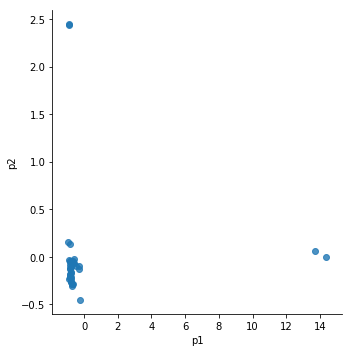

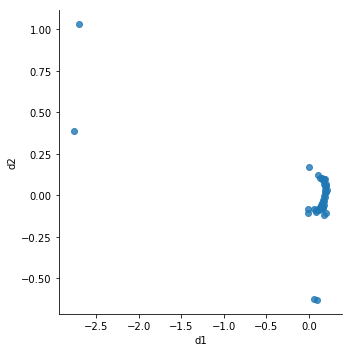

In [247]:
### De la siguiente forma se acomglomeran los datos

sns.lmplot(data=Xp,x='p1',y='p2',fit_reg=False)

sns.lmplot(data=Xmm,x='d1',y='d2',fit_reg=False)


In [248]:
### Vamos a realizar unos clusters para ver patrones en los datos

l = []
for k in range(2,10):
    km =KMeans(n_clusters=k)
    km.fit(Xs)
    l.append(km.inertia_)


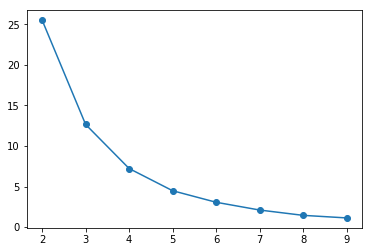

In [249]:
plt.plot(range(2,10),l,marker='o')

In [250]:
gmm = GaussianMixture(n_components=4)
gmm.fit(Xs)
Xp['gmm'] = Xmm['gmm'] = Pob_DIS['gmm'] = Xs['gmm'] = gmm.predict(Xs)

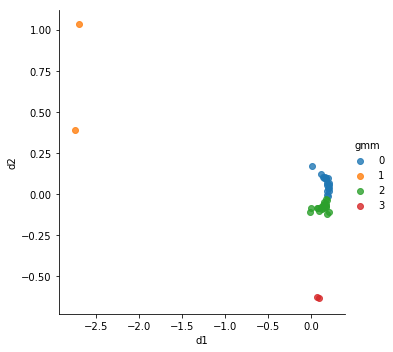

In [251]:
sns.lmplot(data=Xmm,x='d1',y='d2',fit_reg=False,hue='gmm')

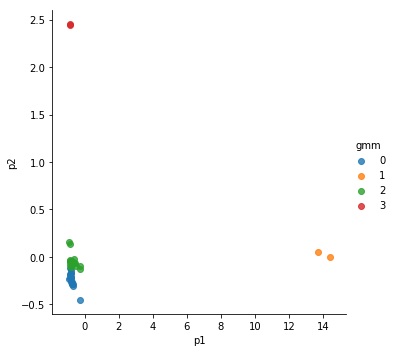

In [252]:
sns.lmplot(data=Xp,x='p1',y='p2',fit_reg=False,hue='gmm')

In [196]:
### Perfilamiento de los datos

Xs.groupby('gmm').mean()

,Población total,Total,Caminar o moverse,Ver,Escuchar,Hablar o comunicarse,Atender el cuidado personal,Poner atención o aprender,Mental,Sin limitación en la actividad,No especificado
gmm,,,,,,,,,,,
0,-0.071442,-0.299246,-0.363113,-0.324601,-0.350763,-0.105486,-0.286633,-0.106771,-0.096027,-0.056623,-0.268692
1,4.302924,4.332764,4.283275,4.316210,4.251332,4.251320,4.281543,4.248498,4.273178,4.291993,3.661647
2,-0.360147,-0.128950,-0.060193,-0.101904,-0.069380,-0.314659,-0.136527,-0.313109,-0.326520,-0.367454,-0.377316
3,-0.418629,-0.479001,-0.473524,-0.477664,-0.470040,-0.470016,-0.473110,-0.469574,-0.470249,-0.475303,2.152430


In [197]:
Edad = Xs.merge(Pob_INS[['EDAD']],how='left',left_index=True,right_index=True)

In [198]:
Edad

,Población total,Total,Caminar o moverse,Ver,Escuchar,Hablar o comunicarse,Atender el cuidado personal,Poner atención o aprender,Mental,Sin limitación en la actividad,No especificado,gmm,EDAD
0,4.191159,4.320130,3.973349,4.105774,4.704074,4.907946,4.035546,4.639257,4.865806,4.173134,3.697265,1,Total
0,4.191159,4.320130,3.973349,4.105774,4.704074,4.907946,4.035546,4.639257,4.865806,4.173134,3.697265,1,Total
1,-0.022972,-0.383048,-0.403752,-0.453058,-0.426539,-0.086294,-0.214214,-0.310438,-0.277801,-0.004831,-0.136415,0,18 años
1,-0.022972,-0.383048,-0.403752,-0.453058,-0.426539,-0.086294,-0.214214,-0.310438,-0.277801,-0.004831,-0.136415,0,18 años
2,-0.001077,-0.258735,-0.384109,-0.365485,-0.347249,0.441632,-0.184303,0.392054,-0.049051,0.015558,-0.238296,0,19 años
2,-0.001077,-0.258735,-0.384109,-0.365485,-0.347249,0.441632,-0.184303,0.392054,-0.049051,0.015558,-0.238296,0,19 años
3,-0.005891,-0.245627,-0.379318,-0.298481,-0.308655,0.158493,-0.220612,0.514338,0.036077,0.010468,-0.262176,0,20 años
3,-0.005891,-0.245627,-0.379318,-0.298481,-0.308655,0.158493,-0.220612,0.514338,0.036077,0.010468,-0.262176,0,20 años
4,-0.008232,-0.268865,-0.375085,-0.302526,-0.312312,0.009677,-0.258000,0.112843,0.060723,0.009232,-0.272963,0,21 años
4,-0.008232,-0.268865,-0.375085,-0.302526,-0.312312,0.009677,-0.258000,0.112843,0.060723,0.009232,-0.272963,0,21 años


In [202]:
aux = Edad.pivot_table(index='EDAD',columns='gmm',aggfunc='count',values='Total').fillna(0).reset_index()

In [203]:
aux

gmm,EDAD,0,1,2,3
0,18 años,2.0,0.0,0.0,0.0
1,19 años,2.0,0.0,0.0,0.0
2,20 años,2.0,0.0,0.0,0.0
3,21 años,2.0,0.0,0.0,0.0
4,22 años,2.0,0.0,0.0,0.0
5,23 años,2.0,0.0,0.0,0.0
6,24 años,2.0,0.0,0.0,0.0
7,25-29 años,2.0,0.0,0.0,0.0
8,30-34 años,2.0,0.0,0.0,0.0
9,35-39 años,0.0,0.0,2.0,0.0


## Proyecciones Conapo

In [302]:
mit_anne

,RENGLON,AÑO,ENTIDAD,CVE_GEO,EDAD,SEXO,POBLACION
0,1,1950,República Mexicana,0,0,Hombres,572103
1,2,1950,República Mexicana,0,0,Mujeres,559162
2,3,1950,República Mexicana,0,1,Hombres,514540
3,4,1950,República Mexicana,0,1,Mujeres,505269
4,5,1950,República Mexicana,0,2,Hombres,478546
5,6,1950,República Mexicana,0,2,Mujeres,469322
6,7,1950,República Mexicana,0,3,Hombres,451932
7,8,1950,República Mexicana,0,3,Mujeres,442707
8,9,1950,República Mexicana,0,4,Hombres,430010
9,10,1950,República Mexicana,0,4,Mujeres,420903


In [303]:
mit_anne_G = mit_anne[mit_anne['ENTIDAD']=='República Mexicana'][['SEXO','EDAD','POBLACION','AÑO']]


In [304]:
mit_anne_H = mit_anne_G[mit_anne_G['SEXO']=='Hombres'].reset_index().drop(['index'],axis=1)
mit_anne_M = mit_anne_G[mit_anne_G['SEXO']=='Mujeres'].reset_index().drop(['index'],axis=1)

In [305]:
mit_anne_pob = mit_anne_H[['POBLACION']]+mit_anne_M[['POBLACION']]

In [306]:
mit_anne_H['Poblacion'] =  mit_anne_pob

In [307]:
Mit_anne = mit_anne_H.drop(['SEXO','POBLACION'], axis=1)

In [317]:
Mit_Anne = Mit_anne[Mit_anne['AÑO'] >= 2010].reset_index().drop(['index'],axis=1)

In [ ]:
Mit_Anne1=Mit_Anne.pivot_table(index='EDAD',columns='AÑO',aggfunc='sum',values='Poblacion').fillna(0).reset_index()

In [341]:
Mit_Anne2=Mit_Anne.pivot_table(index='AÑO',columns='EDAD',aggfunc='sum',values='Poblacion').fillna(0).reset_index()

In [352]:
Mit_Anne2.to_excel("Mit.xlsx")

In [353]:
Mit_ANNE = pd.read_excel("/home/mcorral/Eliot/Pensiones/Mit.xlsx")

In [355]:
Mit_ANNE = Mit_ANNE[['AÑO','TOTAL']] 

In [356]:
Mit_ANNE

,AÑO,TOTAL
0,2010,113748671
1,2011,115367452
2,2012,116935670
3,2013,118453929
4,2014,119936411
5,2015,121347800
6,2016,122715165
7,2017,124041731
8,2018,125327797
9,2019,126577691


In [359]:
# Porcentaje de Poblacion Economicamente Activa, base 2017
PEA = .592813780568


In [360]:
Mit_ANNE_PAE = Mit_ANNE[['TOTAL']]*PEA

In [361]:
Mit_ANNE['PEA'] = Mit_ANNE_PAE

/home/mcorral/.pyenv/versions/3.6.0/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [363]:
PEA_est = Mit_ANNE[['AÑO','PEA']]

In [366]:
PEA_est.to_excel("Pob_PEA_Est.xlsx")